## Run the data cleaning and functions notebook

In [1]:
%run 02_User_Defined_Functions.ipynb

## Overall Public School Retention rate

In [2]:
# Calling school retention rate function
df_cleaned = calculate_school_retention_percentage(df_cleaned)
# Removing extreme outliers from columns
df_cleaned = remove_outliers(df_cleaned)

In [3]:
# Calculating overall retention rate
overall_retention_rate = df_cleaned['RETENTION_PERCENTAGE'].mean()
# Print overall retention rate
print(f'Overall public schools retention rate is: {overall_retention_rate: .2f}%')

Overall public schools retention rate is:  5.46%


## Retention rate by state

In [4]:
# Getting state retention rate
state_retention_rate = calculate_state_retention_rate(df_cleaned)

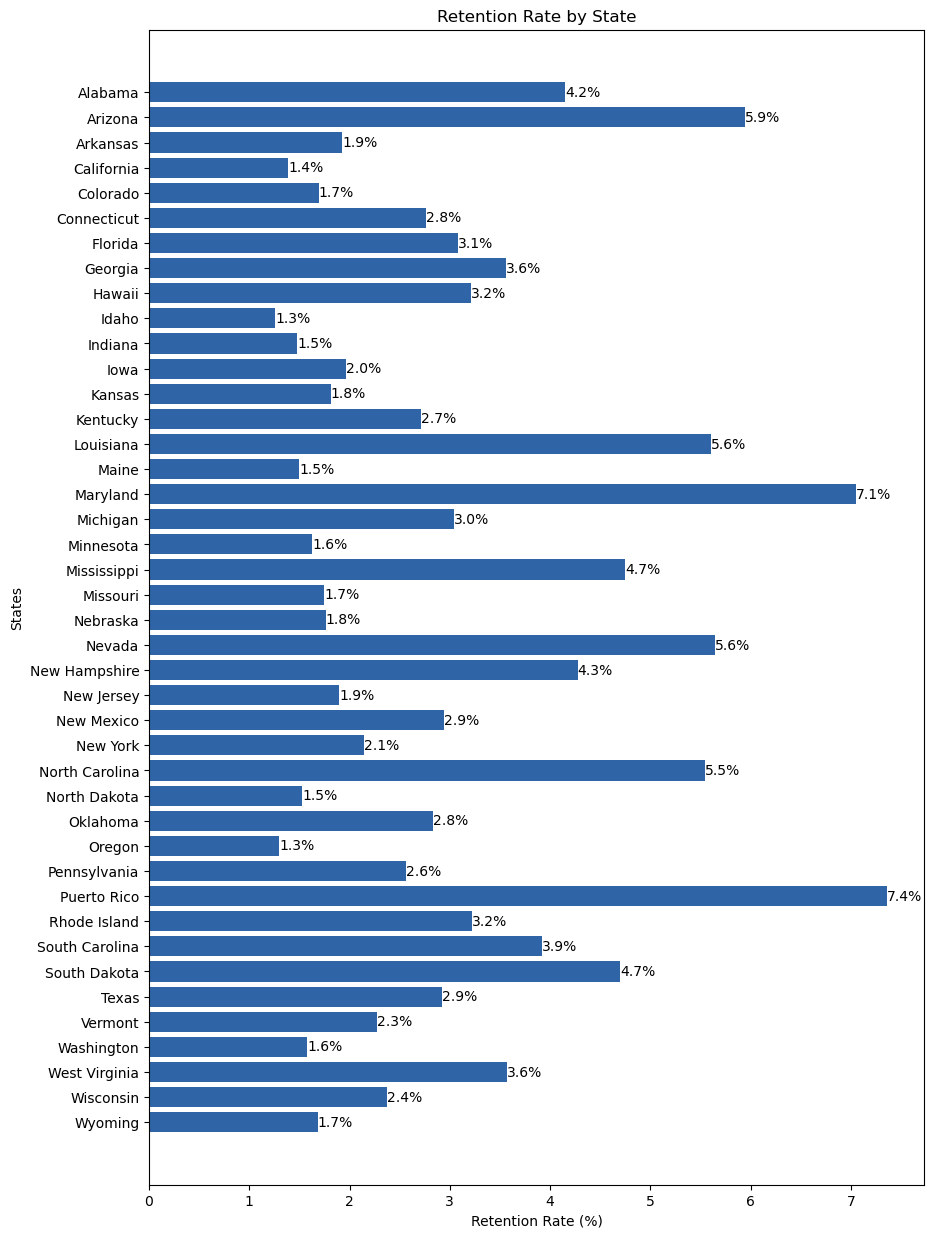

In [5]:
# Plotting retention rate by state
states = df_cleaned['LEA_STATE_NAME'].unique()

state_retention_rate_sorted = [x for _, x in sorted(zip(states, state_retention_rate),reverse=True)]  # Sort retention rates based on alphabetical order of states
states_sorted = sorted(states,reverse=True)  # Sort states alphabetically

fig, ax = plt.subplots(figsize=(10, 15))

bars = plt.barh(states_sorted, state_retention_rate_sorted)

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', ha='left', va='center')

plt.ylabel('States')
plt.xlabel('Retention Rate (%)')
plt.title('Retention Rate by State')
plt.show()

## Retention rate by school level (Elementary,Middle,High)

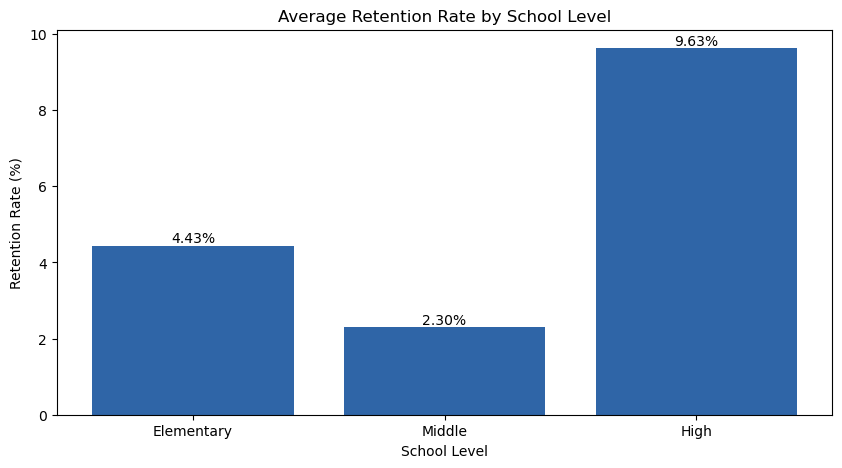

In [6]:
# Getting the order of school level
order = ['Elementary','Middle','High']

# Ordering categorical entries of school level
df_cleaned['SCHOOL_LEVEL'] = pd.Categorical(df_cleaned['SCHOOL_LEVEL'], categories=order)

# Getting school level retention rate
school_level_retention = df_cleaned.groupby('SCHOOL_LEVEL')['RETENTION_PERCENTAGE'].mean().reset_index()

# Plotting average retention rate by school level
plt.figure(figsize=(10, 5))
bars = plt.bar(school_level_retention['SCHOOL_LEVEL'], school_level_retention['RETENTION_PERCENTAGE'])
plt.xlabel('School Level')
plt.ylabel('Retention Rate (%)')
plt.title('Average Retention Rate by School Level')

# Adding text labels to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')
plt.show()

High school retention rate is higher than elementary and middle schools. Now, let's further break it down into grade levels. 

## Retention rate by grade

In [7]:
# Calling grade retention function
grade_retention_rate = calculate_grade_retention_rate(create_grade_df(df_cleaned))

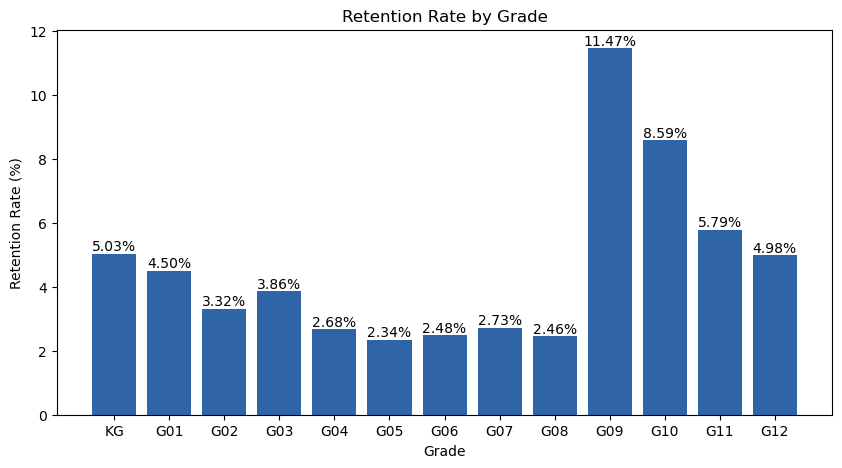

In [8]:
grades = ['KG', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12']
    
# Plotting Retenton rate by grade
plt.figure(figsize=(10, 5))

bars = plt.bar(grades, grade_retention_rate)

plt.xlabel('Grade')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate by Grade')

for bar, rate in zip(bars, grade_retention_rate):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{rate:.2f}%', ha='center', va='bottom')
plt.show()

The above visualization shows that Grade 9 has highest retention rate followed by Grade 10 and Grade 12 shich means higher grades have more retention in comparison to lower grades.

## Overall retention rate by gender

In [9]:
# Getting gender retention rate
df_cleaned = calculate_gender_retention_rate(df_cleaned)

# Calculating overall retention rate by gender
overall_male_retention_rate = df_cleaned ['ret_rate_male'].mean()
overall_female_retention_rate = df_cleaned ['ret_rate_female'].mean()

# Displaying overall retention rate by gender
print (f'Average male retention rate is: {overall_male_retention_rate: .2f}%')
print (f'Average female retention rate is: {overall_female_retention_rate: .2f}%')

Average male retention rate is:  3.55%
Average female retention rate is:  2.86%


## Overall retention rate by race

In [10]:
# Call function that calculates race retention rates 
df_cleaned=calculate_race_retention_rate(df_cleaned)

races = ['AM', 'AS', 'BL', 'HP', 'HI', 'TR', 'WH']

# Defining dictionary containing text for each race
race_texts = {
    'AM': 'Average retention rate for American Indian/Alaska Native students:',
    'AS': 'Average retention rate for Asian students:',
    'BL': 'Average retention rate for Black/African American students:',
    'HP': 'Average retention rate for Hispanic/Latino students:',
    'HI': 'Average retention rate for Native Hawaiian/Other Pacific Islander students:',
    'TR': 'Average retention rate for Two or More Races students:',
    'WH': 'Average retention rate for White students:'
}

for race in races:
    print(f"{race_texts[race]} {df_cleaned[f'ret_rate_{race}'].mean():.2f}%")

Average retention rate for American Indian/Alaska Native students: 3.66%
Average retention rate for Asian students: 1.62%
Average retention rate for Black/African American students: 3.85%
Average retention rate for Hispanic/Latino students: 2.71%
Average retention rate for Native Hawaiian/Other Pacific Islander students: 3.47%
Average retention rate for Two or More Races students: 3.25%
Average retention rate for White students: 2.97%


## Grade retention rate by gender

In [11]:
# Calling grade retention by gender function
total_retention_male_percent, total_retention_female_percent = grade_retention_by_gender(create_grade_df(df_cleaned))

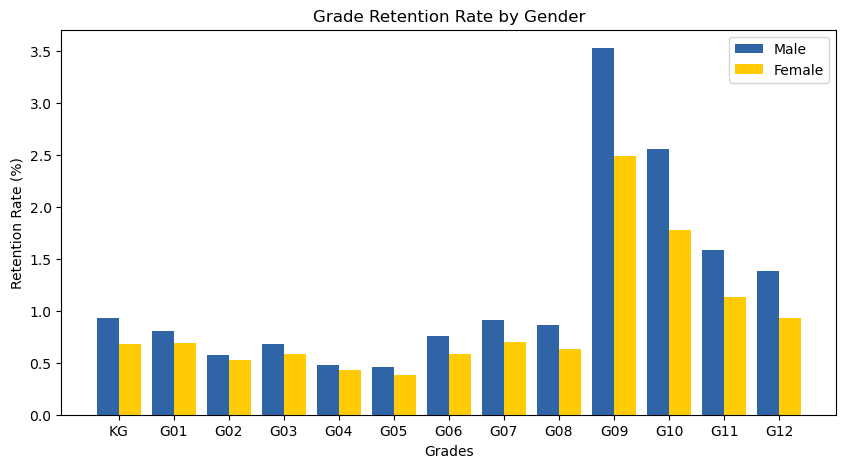

In [12]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.4
index = range(len(grades))

bar1 = plt.bar(index, total_retention_male_percent, bar_width, label='Male')
bar2 = plt.bar([i + bar_width for i in index], total_retention_female_percent, bar_width, label='Female')

plt.xlabel('Grades')
plt.ylabel('Retention Rate (%)')
plt.title('Grade Retention Rate by Gender')
plt.xticks([i + bar_width/2 for i in index], grades)
plt.legend()

plt.show()

The above visualization shows there are more male retention then female retention in each grade.

## Grade retention rate by race

In [13]:
# Calling grade retention by race function
total_retention_race_percent = grade_retention_by_race(create_grade_df(df_cleaned))

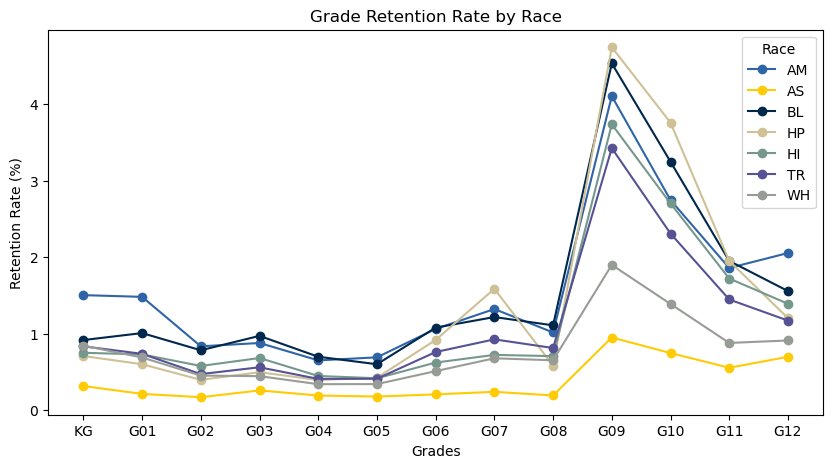

In [14]:
races = ['AM', 'AS', 'BL', 'HP', 'HI', 'TR', 'WH']

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

for race in races:
    plt.plot(grades, total_retention_race_percent[race], marker='o', label=race)

plt.xlabel('Grades')
plt.ylabel('Retention Rate (%)')
plt.title('Grade Retention Rate by Race')
plt.xticks(grades)
plt.legend(title='Race')
plt.show()

The above visualization shows that the highest retention in most of the grades is of BL (Black) and HP (Hispanic) and least retention in most of grades is of race AS (Asian) and WH (White).

## School Level retention rate by gender

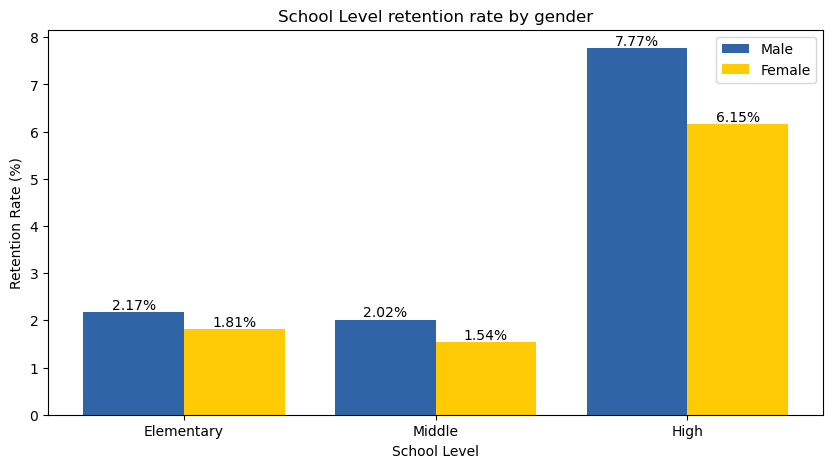

In [15]:
# Calculate retention rates if not already calculated
if 'ret_rate_male' not in df_cleaned.columns or 'ret_rate_female' not in df_cleaned.columns:
    df_cleaned = calculate_gender_retention_rate(df_cleaned)
gender_level_retention = df_cleaned.groupby('SCHOOL_LEVEL')[['ret_rate_male','ret_rate_female']].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.4
index = range(len(school_level_retention))

bar1 = plt.bar(index, gender_level_retention['ret_rate_male'], bar_width, label='Male')
bar2 = plt.bar([i + bar_width for i in index], gender_level_retention['ret_rate_female'], bar_width, label='Female')

plt.xlabel('School Level')
plt.ylabel('Retention Rate (%)')
plt.title('School Level retention rate by gender')
plt.xticks([i + bar_width/2 for i in index], gender_level_retention['SCHOOL_LEVEL'])
plt.legend()

# Adding text labels
for i, rate in enumerate(gender_level_retention['ret_rate_male']):
    plt.text(i, rate, f'{rate:.2f}%', ha='center', va='bottom')

for i, rate in enumerate(gender_level_retention['ret_rate_female']):
    plt.text(i + bar_width, rate, f'{rate:.2f}%', ha='center', va='bottom')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=edfebf59-8cf0-4b7e-b1cf-d80b21ef0191' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>